# IMPORT PACKAGE DAN LIBARARY

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import emoji
import matplotlib.pyplot as plt

import datetime as dt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# LOAD DATASET

In [ ]:
daring = pd.read_csv('Data_Crawling.csv')
daring = daring.iloc[:2306, :5]
daring

,Tweet,Anotator 1,Anotator 2,Anotator 3,FINAL LABEL
0,@quinnturilla omg tysm jijel!!ðŸ«¶ðŸ«¶\njijel ptm atau daring kah?,0.0,0.0,0.0,0.0
1,@convomf pts daring,0.0,0.0,0.0,0.0
2,Bismillah hujan lebat biar daring wkwwk,1.0,1.0,1.0,1.0
3,males bngt Sekarang pelajaran b.sunda sama pjok. untungnya daring,1.0,1.0,1.0,1.0
4,ðŸ’™ daring gak?,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2301,Kursus HAM Akademi Datum Indonesia : Pembelajaran Mandiri Secara Daring (Terbuka Untuk Umum dan Gratis) https://t.co/mNwONG1ORo,0.0,0.0,0.0,0.0
2302,Catatan dan Solusi Penerapan Pembelajaran Daring di Indonesia https://t.co/d6Awt6h0W4,0.0,0.0,0.0,0.0
2303,"Assalamualaikum Wr. Wb kami dari PKBM NURRISEF menawarkan program wajib 12 tahun sesuai tingkat jenjang pendidikan kesetaraan, untuk kegiatan pembelajaran fleksible, dan pembelajaran melalui tatap muka/daring. https://t.co/wfE3Zay0ig",0.0,0.0,0.0,0.0
2304,"Terus dia langsung dibawa ke RS Harjolukito dan dinyatakan meninggal jam 09.30. Gaada pernyataan jelas meninggalnya karena apa sih, mungkin karena cidera kepala berat dan perdarahan. Mirisnya tuh, dia sama temennya besoknya mau mudik karena pembelajaran setelahnya daring..",0.0,0.0,0.0,0.0


# CREATE METHOD - METHOD 

In [ ]:
def text_clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus Mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus Hastags
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT 
    text = re.sub(r"http\S+", '', text) # Mengahpus Links
    text = re.sub(r'[0-9]+', '', text) # Mengahpus Nomor

    text = text.replace('\n', ' ') # Repplace Newline Menjadi Spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Mengahpus Semua Punctuation (Tanda Baca)
    text = text.strip(' ') # Mengapus Spasi Dari Karakter Teks kiri dan kanan

    return text

def deEmojify(text):
    regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", 
        flags = re.UNICODE)
    text = regrex_pattern.sub(r'', text)
    return text

def case_folding(text): #Mengubah semua teks menjadi lowercase
    text = text.lower() 
    return text

def tokenizing(text): #Tokenizer
    text = word_tokenize(text) 
    return text

def stopword_text(text): # Menghapus Stopwords Pada Text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemming_text(text): # Stemming Text
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
daring.isna().sum()

Tweet          0
Anotator 1     0
Anotator 2     0
Anotator 3     0
FINAL LABEL    0
dtype: int64

In [ ]:
# PREPROSES TEXT

daring['Tweet_Clean'] = daring['Tweet'].apply(text_clean)
daring['Tweet_Clean'] = daring['Tweet_Clean'].apply(deEmojify)
daring['Tweet_Clean'] = daring['Tweet_Clean'].apply(case_folding)

daring['Tweet_Preprocess'] = daring['Tweet_Clean'].apply(tokenizing)
daring['Tweet_Preprocess'] = daring['Tweet_Preprocess'].apply(stopword_text)
daring['Tweet_Preprocess'] = daring['Tweet_Preprocess'].apply(stemming_text)
daring['Tweet_New'] = daring['Tweet_Preprocess'].apply(lambda x: remove_punct(x))

#DROP ALL DATA DUPLICATES
daring.drop_duplicates(subset='Tweet_Clean', inplace=True)

In [ ]:
daring.isna().sum()

Tweet               0
Anotator 1          0
Anotator 2          0
Anotator 3          0
FINAL LABEL         0
Tweet_Clean         0
Tweet_Preprocess    0
Tweet_New           0
dtype: int64

In [ ]:
daring = daring.drop(['Anotator 1', 'Anotator 2', 'Anotator 3', 'Tweet_Clean'], axis = 1)

In [ ]:
daring.isna().sum()

Tweet               0
FINAL LABEL         0
Tweet_Preprocess    0
Tweet_New           0
dtype: int64

In [ ]:
#Export To .csv File
daring.to_csv(r'Daring_Tweets_Clean.csv', index=False)

# ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
daring = pd.read_csv('Daring_Tweets_Clean.csv')

daring.isna().sum()

Tweet               0
FINAL LABEL         0
Tweet_Preprocess    0
Tweet_New           1
dtype: int64

In [ ]:
daring.dropna(subset=['Tweet_New'], inplace = True)

In [ ]:
daring

,Tweet,FINAL LABEL,Tweet_Preprocess,Tweet_New
0,@quinnturilla omg tysm jijel!!ðŸ«¶ðŸ«¶\njijel ...,0.0,"['omg', 'tysm', 'jijel', '', '', '', '', 'jije...",omg tysm jijel jijel ptm daring kah
1,@convomf pts daring,0.0,"['pts', 'daring']",pts daring
2,Bismillah hujan lebat biar daring wkwwk,1.0,"['bismillah', 'hujan', 'lebat', 'biar', 'darin...",bismillah hujan lebat biar daring wkwwk
3,males bngt Sekarang pelajaran b.sunda sama pjo...,1.0,"['males', 'bngt', 'ajar', 'bsunda', 'pjok', 'u...",males bngt ajar bsunda pjok untung daring
4,ðŸ’™ daring gak?,0.0,"['', '', '', 'daring', 'gak']",daring gak
...,...,...,...,...
1556,joktug! yang bisa bikin teks ekposisi 200 kata...,0.0,"['joktug', 'bikin', 'teks', 'ekposisi', 'ajar'...",joktug bikin teks ekposisi ajar daring univ dl...
1557,Catatan dan Solusi Penerapan Pembelajaran Dari...,0.0,"['catat', 'solusi', 'terap', 'ajar', 'daring',...",catat solusi terap ajar daring indonesia
1558,"Dari beberapa permasalahan, hal paling menonjo...",-1.0,"['masalah', 'tonjol', 'rendah', 'tingkat', 'pa...",masalah tonjol rendah tingkat paham kuasa mate...
1559,Assalamualaikum Wr. Wb kami dari PKBM NURRISEF...,0.0,"['assalamualaikum', 'wr', 'wb', 'pkbm', 'nurri...",assalamualaikum wr wb pkbm nurrisef tawar prog...


In [ ]:
daring['FINAL LABEL'].value_counts()

 0.0    921
-1.0    330
 1.0    309
Name: FINAL LABEL, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

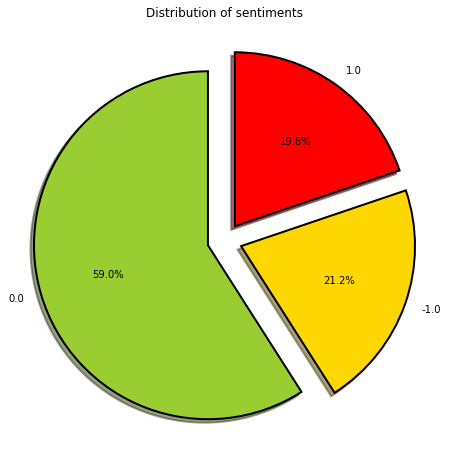

In [ ]:
#Melihat Distribusi Sentimen 
fig = plt.figure(figsize=(8,8))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = daring['FINAL LABEL'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
# SHOW 20 TWEET CLEAN POSITIVE
pd.set_option('display.max_colwidth', 3000)
positive_tweets = daring[daring['FINAL LABEL'] == 1]
positive_tweets = positive_tweets[['Tweet_New', 'FINAL LABEL']].sort_values(by = 'FINAL LABEL', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:20]

,Tweet_New,FINAL LABEL
1,bismillah hujan lebat biar daring wkwwk,1.0
2,bikin lemes ajaa puasa sekolah mending daring,1.0
3,braw kelas daring pus gitu gaa ya,1.0
4,alas utama nya anak ga duduk kelas sih bom dapet sd negeri yg akomodasi ajar full ruang ajar daring ya sekolah yg ga titik rat nilai fokus cerdas anak,1.0
5,alhamdulillah ya allah doa kabul full daring sampe semester ini,1.0
6,ga sih milihnya daring ramadhan luring habis lebaran tt,1.0
7,sambat gatau lepas uts ngerasa beban kuliah organisasi langsung gunung waktu sama tambah sedia hybrid daring dah milih daring sistem ketul sedia hybrid,1.0
8,males pesantren sekolah ah ptm lagiii agjahzhahdjs mending daring aja pesantren takut hafal,1.0
9,fess balik daring,1.0
10,yg daring jam puasa cung jari sendiri,1.0


In [ ]:
# SHOW 20 TWEET CLEAN NEGATIVE
pd.set_option('display.max_colwidth', 3000)
positive_tweets = daring[daring['FINAL LABEL'] == -1]
positive_tweets = positive_tweets[['Tweet_New', 'FINAL LABEL']].sort_values(by = 'FINAL LABEL', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:20]

,Tweet_New,FINAL LABEL
1,kalo daring bawaanya ngantuk shdbrhbfheh,-1.0
2,terimakasih tahu mbak kuliah daring semester kemarin benarbenar efektif mahasiswa bukti ya cermin tulis pikir mbak,-1.0
3,karna kuliah daring mahasiswa oon bg,-1.0
4,ga sih lomba daring ngepost twibbon ga pede ikut lomba gara post twibbon malu takut ga menang ken ngasah mampu kuliah cm,-1.0
5,akibat kuliah daring asik tiktokan turun jalan oknum,-1.0
6,kuliah daring aja sok keras,-1.0
7,gue tau berita aksi demo mahasiswa gua mikir jaman covid lo elo adek mahasiswa peduli sih sm begitu udah lo kuliah daring yg bisa mute audio even video otak lo mikir mana luar ajar,-1.0
8,polri contoh mahasiswa pea urak demoyg kaya gitu bilang mahasiswa yg bela aspirasi rakyatbergelar mahasiswa laku kaya anak tkmakannya kalo kuliah daring hasil cuman beratem tutorial bikin anak doang,-1.0
9,daring iya pake media youtube kak kadang bantu kadang engga enak dijelasin langsung guru ketimbang dijelasin youtube wkwk,-1.0
10,enak ptm sih ak liat kek nolep bgt kalo daring sumpah txt coming soon iscoming xtogether txt members bighit,-1.0


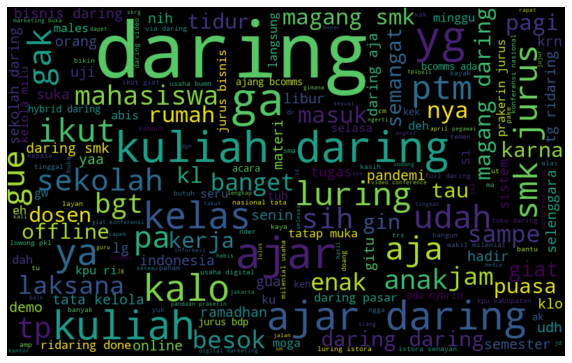

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in daring['Tweet_New']])

wordcloud = WordCloud(width=800, height=500, random_state=42, background_color='black',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

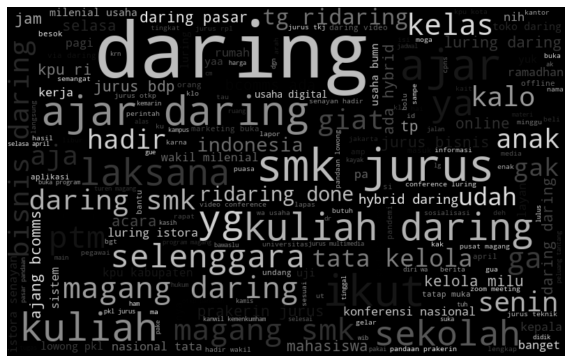

In [ ]:
# NEUTRAL
all_words = ' '.join([text for text in daring['Tweet_New'][daring['FINAL LABEL'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, background_color='black', colormap ='gray', max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

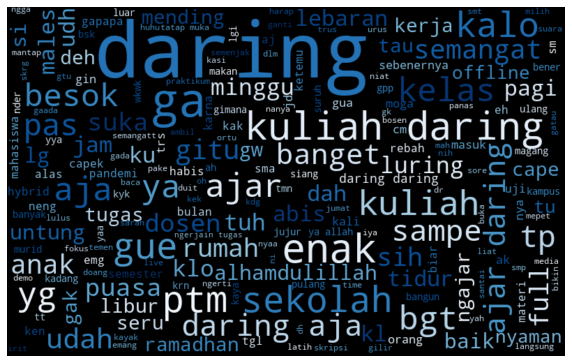

In [ ]:
# POSITIVE
all_words = ' '.join([text for text in daring['Tweet_New'][daring['FINAL LABEL'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, background_color='black', colormap ='Blues', max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

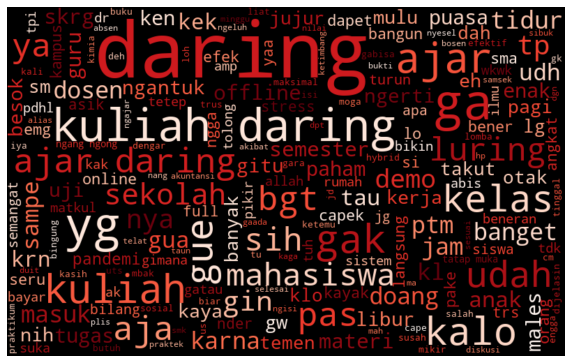

In [ ]:
# Negative
all_words = ' '.join([text for text in daring['Tweet_New'][daring['FINAL LABEL'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, background_color='black', colormap = 'Reds', max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# MODEL SVM

In [ ]:
from sklearn.model_selection import train_test_split

x = daring['Tweet_New'].values
y = daring['FINAL LABEL'].values

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,10))
x = tf_idf.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

In [ ]:
len(y_test)

312

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import *

model = SVC(kernel = 'linear', C = 1, gamma = 1.0 , decision_function_shape = 'ovr', class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy   : {accuracy_score(y_pred, y_test)}')
print(f"Recall     : {recall_score(y_pred, y_test, average = 'macro')}")
print(f"Precission : {precision_score(y_pred, y_test, average = 'macro')}")
print(f"F1 score   : {f1_score(y_pred, y_test, average = 'macro')}")

Accuracy   : 0.6634615384615384
Recall     : 0.7144935833214063
Precission : 0.47025125023021236
F1 score   : 0.48597628295096457


In [ ]:
y_test_new = []
for i in y_test:
  if i == -1:
    i = 2
  y_test_new.append(i)

In [ ]:
y_pred_new = []
for i in y_pred:
  if i == -1:
    i = 2
  y_pred_new.append(i)

Text(69.0, 0.5, 'Class Asli')

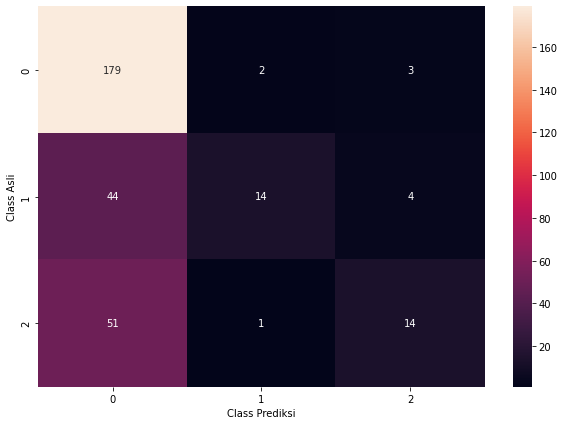

In [ ]:
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test_new,predictions=y_pred_new)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Class Prediksi')
plt.ylabel('Class Asli')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

         0.0       0.65      0.97      0.78       184
         1.0       0.82      0.23      0.35        62
         2.0       0.67      0.21      0.32        66

    accuracy                           0.66       312
   macro avg       0.71      0.47      0.49       312
weighted avg       0.69      0.66      0.60       312



# UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(-1.0, 309), (0.0, 309), (1.0, 309)]


In [ ]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_resampled, y_resampled, test_size = 0.2, stratify = y_resampled, random_state = 0)

model = SVC(kernel = 'linear', C = 1000, gamma = 1.0 , decision_function_shape = 'ovr', class_weight = 'balanced')
model.fit(X_train_R, y_train_R)

y_pred_R = model.predict(X_test_R)

print(f'Accuracy   : {accuracy_score(y_pred_R, y_test_R)}')
print(f"Recall     : {recall_score(y_pred_R, y_test_R, average = 'macro')}")
print(f"Precission : {precision_score(y_pred_R, y_test_R, average = 'macro')}")
print(f"F1 score   : {f1_score(y_pred_R, y_test_R, average = 'macro')}")

Accuracy   : 0.6236559139784946
Recall     : 0.6312754773653723
Precission : 0.6236559139784946
F1 score   : 0.6212609655549693


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(x, y)
print(sorted(Counter(y_smote).items()))

[(-1.0, 921), (0.0, 921), (1.0, 921)]


In [ ]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_smote, y_smote, test_size = 0.2, stratify = y_smote, random_state = 0)

model = SVC(kernel = 'linear', C = 1, gamma = 1.0 , decision_function_shape = 'ovr', class_weight = 'balanced')
model.fit(X_train_S, y_train_S)

y_pred_S = model.predict(X_test_S)

print(f'Accuracy   : {accuracy_score(y_pred_S, y_test_S)}')
print(f"Recall     : {recall_score(y_pred_S, y_test_S, average = 'macro')}")
print(f"Precission : {precision_score(y_pred_S, y_test_S, average = 'macro')}")
print(f"F1 score   : {f1_score(y_pred_S, y_test_S, average = 'macro')}")

Accuracy   : 0.9602169981916817
Recall     : 0.9603946894207261
Precission : 0.9602036819428124
F1 score   : 0.9602666566824553


In [ ]:
y_test_new_S = []
for i in y_test_S:
  if i == -1:
    i = 2
  y_test_new_S.append(i)

In [ ]:
y_pred_new_S = []
for i in y_pred_S:
  if i == -1:
    i = 2
  y_pred_new_S.append(i)

Text(69.0, 0.5, 'Class Asli')

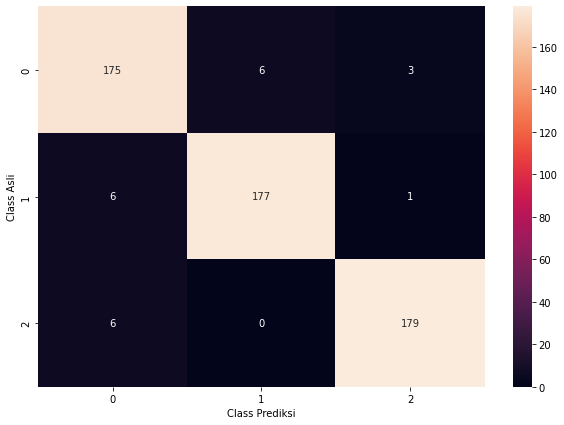

In [ ]:
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test_new_S,predictions=y_pred_new_S)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Class Prediksi')
plt.ylabel('Class Asli')

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_new_S, y_pred_new_S))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       184
         1.0       0.97      0.96      0.96       184
         2.0       0.98      0.97      0.97       185

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553



In [ ]:
confusion_matrix(y_test_S, y_pred_S)

array([[183,   2,   0],
       [ 24, 147,  13],
       [  2,  13, 169]])